In [ ]:
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import clear_output

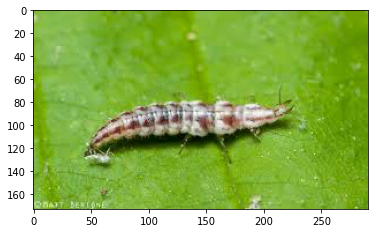

In [ ]:
flw=Image.open('/content/flower.jpeg', 'r')
ins=Image.open('/content/insect.jpeg', 'r')
sml=Image.open('/content/smile.jpeg', 'r')
imshow(np.asarray(ins))

In [ ]:
flw = flw.resize((300,300))
ins = ins.resize((300,300))
sml = sml.resize((300,300))

In [ ]:
arr1=np.asarray(flw,dtype=np.float32)
arr2=np.asarray(ins,dtype=np.float32)
arr3=np.asarray(sml,dtype=np.float32)

In [ ]:
def weights(channel_300):
  z=np.zeros((296,296,25),dtype=np.float32)
  for i in range(2,297):
    for j in range(2,297):
      z[i-2,j-2,:]=channel_300[i-2:i+3,j-2:j+3].flatten()
      z[i-2,j-2,:]=z[i-2,j-2,:]-np.mean(z[i-2,j-2,:])
      z[i-2,j-2,:]=(z[i-2,j-2,:]>0)*1
      z[i-2,j-2,:]=4*z[i-2,j-2,:]-2
  return z

In [ ]:
z=weights(arr2[:,:,0])
z[0][0]

array([-2., -2., -2.,  2.,  2., -2., -2., -2.,  2.,  2., -2., -2., -2.,
        2.,  2., -2., -2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
      dtype=float32)

In [ ]:
arr1=(arr1/255)
arr2=(arr2/255)
arr3=(arr3/255)

In [ ]:
def synchronization(alpha,iter,channel_300):
  z=weights(channel_300)
  theta=np.zeros((300,300,2),dtype=np.float32)
  theta[:,:,0]=np.zeros((300,300),dtype=np.float32)
  freq=np.copy(channel_300)
  for k in range(1,iter+1):
    print(k)
    for i in range(2,297):
      for j in range(2,297):
        theta[i,j,k%2]=theta[i,j,(k+1)%2]+alpha*(freq[i][j]+np.sum(np.sin(theta[i-2:i+3,j-2:j+3,(k+1)%2].flatten()-theta[i,j,(k+1)%2])*z[i-2,j-2,:]))
    clear_output()
  return theta



In [ ]:
t1=synchronization(0.005,10,arr2[:,:,0])


In [ ]:
t2=synchronization(0.005,10,arr2[:,:,1])

In [ ]:
t3=synchronization(0.005,10,arr2[:,:,2])

In [ ]:
def processing(thetas,alpha):
  channel=(thetas[:,:,1]-thetas[:,:,0])/0.005
  #channel=thetas[:,:,0]
  #channel=channel.reshape(298,298)
  channel=((channel-np.min(channel))/(np.max(channel)-np.min(channel)))*255
  #channel=np.rint(channel)
  channel=np.asarray(np.clip(channel,0,255),dtype=np.uint8)
  return channel



In [ ]:
np.std((t1[1:299,1:299,0]-t1[1:299,1:299,1])/0.005)

0.14894962

In [ ]:
channel_1=processing(t1,0.005)
channel_2=processing(t2,0.005)
channel_3=processing(t3,0.005)

In [ ]:
img=np.ones((300,300,3),dtype=np.uint8)

In [ ]:
img[:,:,0]=channel_1
img[:,:,1]=channel_2
img[:,:,2]=channel_3

In [ ]:
channel_1

array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 153, ..., 253, 253, 253],
       ...,
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

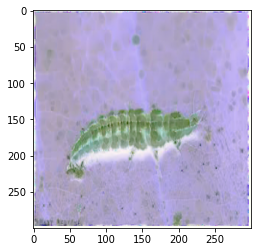

In [ ]:
imshow(np.asarray(img))

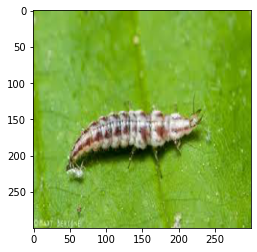

In [ ]:
imshow(np.asarray(ins))

In [ ]:
l=np.random.uniform(-5,5,(3,3))
l

array([[-3.65185308, -3.28790832,  3.2251797 ],
       [-0.65404124, -4.01412304,  3.91070467],
       [ 0.16323745, -4.25897375,  3.57151912]])

In [ ]:
l=(l>0)*1
l=6*l-3
l

array([[-3, -3,  3],
       [-3, -3,  3],
       [ 3, -3,  3]])